# Overview

My wife is a huge K-pop fan and her favorite artists run raffles for 1 on 1 video calls with fans. To enter the raffle she needs to buy one physical album of their music per entry. She's considering running a bulk order for a large group of fans in order to maximize her chances of winning. Can we simulate how many albums she needs to buy to maximize her chances of winning?

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [12]:
# Assume the total number of winners per raffle is 10
num_winners = 15

# Estimate the total number of albums sold. This value is kept low for script to run quickly. Adjust as needed. 
total_albums = 3000

# We'll run the simulation x number of time to get the mean result
num_simulations = 30

# Store the results in a list
results = []

# Iterate over range of albums starting with 1 album
for i in range(1, total_albums):
    
    # initiate empty list
    num_draws_to_win = []

    # simulate a series of drawings with i entries into raffle
    for n in range(num_simulations):

        # set initial parameters
        albums_purchased = i
        num_draws = 0
        drawing_result = False

        # Calculate probability of winning
        prob_win = albums_purchased/total_albums
    
        # Draw until a win occurs
        while drawing_result == False:
            drawing_result = np.random.choice([True, False], p=[prob_win, 1 - prob_win])
            
            # Increase num_trials count by 1
            num_draws += 1
        
        # Add number of draws it took for a win to list 
        num_draws_to_win.append(num_draws)

    # Get average drawings to win for current i
    mean_drawings = np.mean(num_draws_to_win)

    # Add mean result to results list as tuple
    results.append((i,mean_drawings))

    # Break loop once we find the number of albums_needed
    if mean_drawings <= num_winners:
        albums_needed = i
        break

# Print the result
if albums_needed is not None:
    print(f"Albums needed to win: {albums_needed}")
else:
    print("The required number of albums to win was not found in the simulation.")

Albums needed to win: 148


# Plot Results

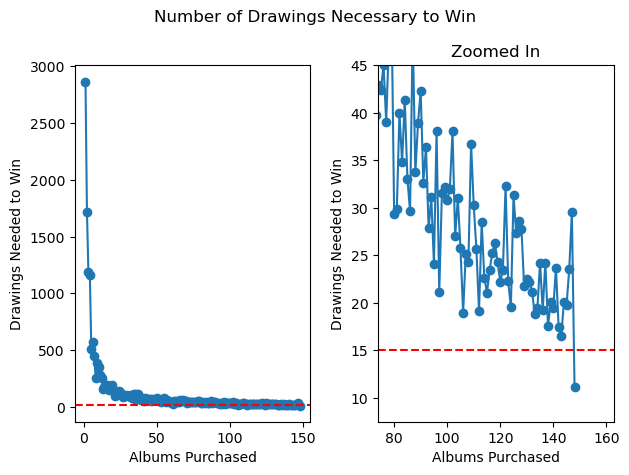

In [13]:
# Unpack list of tuples
x,y = zip(*results)

# Create 1 row, 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Create a line plot
ax1.plot(x, y, marker='o') # 'o' is for circle markers

# Draw a horizontal line at y = 50
ax1.axhline(y=num_winners, color='r', linestyle='--')
# Adding title and labels

ax1.set_xlabel('Albums Purchased')
ax1.set_ylabel('Drawings Needed to Win')

# Create a line plot
ax2.plot(x, y, marker='o') # 'o' is for circle markers

# Draw a horizontal line at y = 50
ax2.axhline(y=num_winners, color='r', linestyle='--')

# Adding title and labels
ax2.set_xlabel('Albums Purchased')
ax2.set_ylabel('Drawings Needed to Win')
ax2.set_title('Zoomed In')

# Set axes limits
y_limit_upper = 3*num_winners 
y_limit_lower = .5*num_winners
ax2.set_ylim(y_limit_lower, y_limit_upper)
x_limit_upper = 1.1*albums_needed
x_limit_lower = 0.5*albums_needed
ax2.set_xlim(x_limit_lower, x_limit_upper)

# Set the overall title for the figure
fig.suptitle('Number of Drawings Necessary to Win')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Find Elbow in Graph
Determine the point after which increasing the number of albums purchased results in diminishing returns in terms of reducing the number of drawings needed.

In [14]:
# Assuming x and y contain the data from the results
kneedle = KneeLocator(x, y, curve='convex', direction='decreasing')

print(f"The elbow is located at x = {kneedle.elbow}. Odds of winning diminish after purchasing {kneedle.elbow} albums.")

The elbow is located at x = 5. Odds of winning diminish after purchasing 5 albums.
